In [826]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re
from textblob import TextBlob

In [827]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [828]:
# Loading the dataset from the specified path on Google Drive
df = pd.read_csv("/content/drive/MyDrive/Zomato EDA Project/Indian-Resturants.csv")

In [829]:
# Setting the display option to show all columns when displaying the DataFrame
pd.set_option('display.max_columns', None)

In [830]:
# Accessing the column names of the DataFrame 'df'
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [831]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [832]:
# Generating Statistical summary of numerical columns of the dataset
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [833]:
# Displaying the first 50 rows of the DataFrame to get an overview of the data
df.head(50)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,NaN,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001.0,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010.0,1,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,282002.0,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,NaN,1,"Tajganj, Agra","North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
5,3400275,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-civi...,"114/23 G, Deep Shikha Complex, Sanjay Place, C...",Agra,34,Civil Lines,27.201516,78.007556,NaN,1,"Civil Lines, Agra","Pizza, Fast Food",10:57 AM to 11 PM,400,2,Rs.,"['Credit Card', 'Lunch', 'Delivery', 'Dinner',...",4.0,Very Good,707,62,0.0,-1,-1
6,3400296,Honeydew Restaurant,['Quick Bites'],https://www.zomato.com/agra/honeydew-restauran...,"Opposite Soami Bagh Temple, Dayal Bagh, Agra",Agra,34,Dayal Bagh,27.222175,78.010174,282005.0,1,"Dayal Bagh, Agra","North Indian, Fast Food, Chinese, South Indian","11am – 10:35pm (Mon, Tue, Wed, Fri, Sat), 11am...",500,2,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",4.2,Very Good,647,46,0.0,1,-1
7,3400368,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-sika...,"Plot C-1/6, Sector 13, Sikandra, Agra",Agra,34,Sikandra,27.203930,77.954260,NaN,1,"Sikandra, Agra","Pizza, Fast Food",10:57 AM to 11 PM,400,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",3.8,Good,617,18,0.0,-1,-1
8,3401284,Cake House,['Bakery'],https://www.zomato.com/agra/cake-house-2-civil...,"23/301, Wazirpura Rd, Judge Compound Chowraha,...",Agra,34,Civil Lines,27.204148,78.009025,NaN,1,"Civil Lines, Agra","Bakery, Fast Food",9 AM to 9 PM,500,2,Rs.,"['Takeaway Available', 'Cash', 'Indoor Seating...",3.4,Average,322,14,0.0,1,-1
9,3400838,Sugar N Thyme,['Café'],https://www.zomato.com/agra/sugar-n-thyme-tajg...,"1374 K/1375 K, Ground floor, Dinesh Nagar, Fat...",Agra,34,Tajganj,27.158243,78.045591,282001.0,1,"Tajganj, Agra","Cafe, Chinese, Continental, Italian, Bakery, D...","12midnight – 1am, 11:30am – 12midnight (Mon-Sun)",1000,3,Rs.,"['No Alcohol Available', 'Dinner', 'Delivery',...",4.4,Very Good,289,324,0.0,1,-1


In [834]:
# Displaying the dimensions (number of rows and columns) of the DataFrame
df.shape

(211944, 26)

In [835]:
# Displaying a concise summary of the DataFrame                                       , including the data types of each column and the number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [836]:
# Displaying the total number of missing values in each column of the DataFrame
df.isnull().sum()

,0
res_id,0
name,0
establishment,0
url,0
address,134
city,0
city_id,0
locality,0
latitude,0
longitude,0


In [837]:
# Calculating the percentage of missing values in each column of the DataFrame
null_rows_percentage = df.isnull().sum()/df.shape[0]*100

# Displaying the percentage of missing values in each column
null_rows_percentage

,0
res_id,0.000000
name,0.000000
establishment,0.000000
url,0.000000
address,0.063224
city,0.000000
city_id,0.000000
locality,0.000000
latitude,0.000000
longitude,0.000000


In [838]:
# Identifying columns with more than 5% missing values and creating a list of their names
drop_columns = null_rows_percentage[null_rows_percentage>5].keys().tolist()

# Displaying the list of columns to be dropped
drop_columns

['zipcode']

In [839]:
# Creating a new DataFrame by dropping columns that have more than 5% missing values
df_1 = df.drop(columns=drop_columns)

# Printing the names of the columns that were deleted
print(f"Column deleted: {drop_columns}")

Column deleted: ['zipcode']


<Axes: >

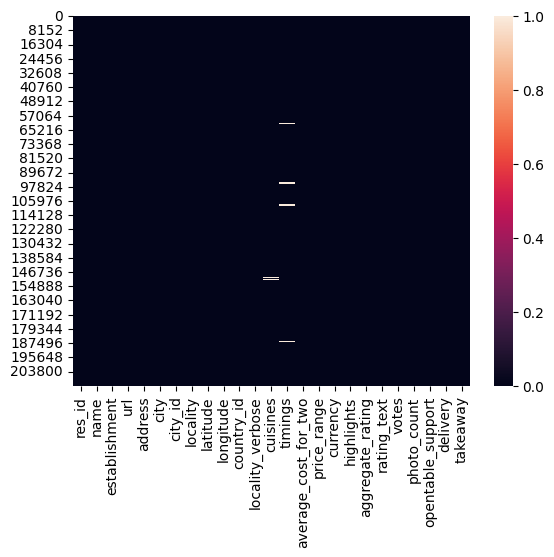

In [840]:
# Before
# Creating a heatmap to visualize the missing values in the DataFrame 'df_1' using seaborn
sns.heatmap(df_1.isnull())

In [841]:
# Filling missing values in the 'address' column by concatenating the 'locality' and 'city' columns
df_1['address'] = df_1['address'].fillna(df_1['locality'] + ', ' + df_1['city'])

In [842]:
df_1.isnull().sum()

,0
res_id,0
name,0
establishment,0
url,0
address,0
city,0
city_id,0
locality,0
latitude,0
longitude,0


In [843]:
# Before
# Counting the number of columns in the DataFrame that have any missing values
df_1.isnull().any(axis=0).sum()

3

In [844]:
# Dropping rows from the DataFrame that have more than 10 non-null values
df_1 = df_1.dropna(thresh=len(df_1.columns) - 10)

In [845]:
# After
# Counting the number of columns in the DataFrame that have any missing values
df_1.isnull().any(axis=0).sum()

3

In [846]:
df_1.isnull().sum()

,0
res_id,0
name,0
establishment,0
url,0
address,0
city,0
city_id,0
locality,0
latitude,0
longitude,0


In [847]:
# Printing the unique values in the 'opentable_support' column
print(df_1['opentable_support'].unique())

# Printing the number of unique values in the 'opentable_support' column
print(df_1['opentable_support'].nunique())

[ 0. nan]
1


In [848]:
# Finding the most frequent (mode) value in the 'opentable_support' column
mode_opentable_support = df_1['opentable_support'].mode()[0]

# Filling missing values in the 'opentable_support' column with the mode value
df_1['opentable_support'] = df_1['opentable_support'].fillna(mode_opentable_support)

In [849]:
# Printing the unique values in the 'cuisines' column
print(df_1['cuisines'].unique())

# Printing the number of unique values in the 'cuisines' column
print(df_1['cuisines'].nunique())

['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']
9382


In [850]:
# Filling missing values in the 'cuisines' column with the string 'Unknown'
df_1['cuisines'] = df_1['cuisines'].fillna('Unknown')

In [851]:
# Printing the unique values in the 'timings' column
print(df_1['timings'].unique())

# Printing the number of unique values in the 'timings' column
print(df_1['timings'].nunique())

['8:30am – 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' ... '8am – 2:30pm, 5pm – 10pm (Mon-Sun)'
 '8am – 3pm, 6:30pm – 11pm (Mon-Sun)'
 '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)']
7740


In [852]:
# Finding the most frequent (mode) value in the 'timings' column
mode_timings = df_1['timings'].mode()[0]

# Filling missing values in the 'timings' column with the mode value
df_1['timings'] = df_1['timings'].fillna(mode_timings)

In [853]:
df_1.isnull().sum()

,0
res_id,0
name,0
establishment,0
url,0
address,0
city,0
city_id,0
locality,0
latitude,0
longitude,0


In [854]:
df_1.isnull().any(axis=0).sum()

0

<Axes: >

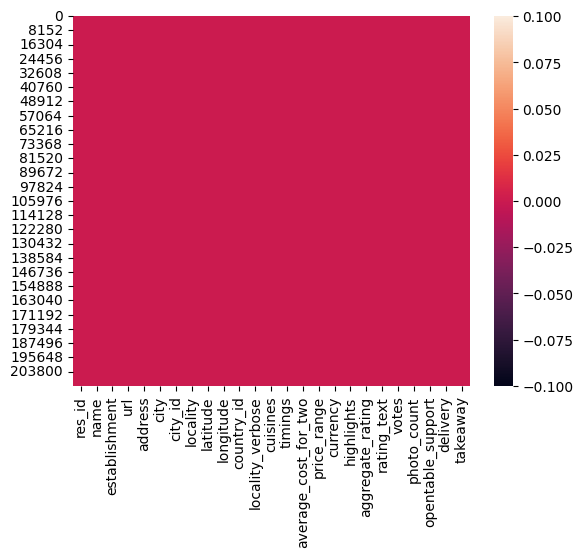

In [855]:
# After
# Creating a heatmap to visualize the missing values in the DataFrame 'df_1' using seaborn
sns.heatmap(df_1.isnull())

In [856]:
df_1.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,1,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,1,"Tajganj, Agra","North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [857]:
df_1.shape

(211944, 25)

In [858]:
# Checking for duplicate rows
df_1['res_id'].nunique()

55568

In [859]:
# Sorting the DataFrame 'df_1' by the 'res_id' column in ascending order
df_1 = df_1.sort_values(by=['res_id'], ascending=True).reset_index(drop=True)

In [860]:
df_1.head(10)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,50,Fujiya,['Casual Dining'],https://www.zomato.com/ncr/fujiya-chanakyapuri...,"12/48, Malcha Marg Market, Chanakyapuri, New D...",New Delhi,1,Chanakyapuri,28.601553,77.186105,1,"Chanakyapuri, New Delhi","Chinese, Japanese, Seafood, Fast Food, Momos",12 Noon to 11:30 PM,1500,3,Rs.,"['Delivery', 'Credit Card', 'Lunch', 'Takeaway...",3.8,Good,1074,551,0.0,1,-1
1,55,Berco's,['Casual Dining'],https://www.zomato.com/ncr/bercos-connaught-pl...,"E-42 & 43, Inner Circle, Connaught Place, New ...",New Delhi,1,Connaught Place,28.632012,77.221447,1,"Connaught Place, New Delhi","Chinese, Thai, Asian",11:30am – 11pm (Mon-Sun),1600,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Deli...",4.0,Very Good,4096,2032,0.0,1,-1
2,55,Berco's,['Casual Dining'],https://www.zomato.com/ncr/bercos-connaught-pl...,"E-42 & 43, Inner Circle, Connaught Place, New ...",New Delhi,1,Connaught Place,28.632012,77.221447,1,"Connaught Place, New Delhi","Chinese, Thai, Asian",11:30am – 11pm (Mon-Sun),1600,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Deli...",4.0,Very Good,4096,2032,0.0,1,-1
3,55,Berco's,['Casual Dining'],https://www.zomato.com/ncr/bercos-connaught-pl...,"E-42 & 43, Inner Circle, Connaught Place, New ...",New Delhi,1,Connaught Place,28.632012,77.221447,1,"Connaught Place, New Delhi","Chinese, Thai, Asian",11:30am – 11pm (Mon-Sun),1600,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Deli...",4.0,Very Good,4096,2032,0.0,1,-1
4,64,Diva - The Italian Restaurant,['Fine Dining'],https://www.zomato.com/ncr/diva-the-italian-re...,"M-8A, M Block Market, Greater Kailash (GK) 2, ...",New Delhi,1,"M Block Market, Greater Kailash 2 (GK2)",28.534088,77.243184,1,"M Block Market, Greater Kailash 2 (GK2), New D...",Italian,12:30 PM to 11:30 PM,2500,4,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.0,Very Good,530,442,0.0,-1,-1
5,64,Diva - The Italian Restaurant,['Fine Dining'],https://www.zomato.com/ncr/diva-the-italian-re...,"M-8A, M Block Market, Greater Kailash (GK) 2, ...",New Delhi,1,"M Block Market, Greater Kailash 2 (GK2)",28.534088,77.243184,1,"M Block Market, Greater Kailash 2 (GK2), New D...",Italian,12:30 PM to 11:30 PM,2500,4,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.0,Very Good,530,442,0.0,-1,-1
6,64,Diva - The Italian Restaurant,['Fine Dining'],https://www.zomato.com/ncr/diva-the-italian-re...,"M-8A, M Block Market, Greater Kailash (GK) 2, ...",New Delhi,1,"M Block Market, Greater Kailash 2 (GK2)",28.534088,77.243184,1,"M Block Market, Greater Kailash 2 (GK2), New D...",Italian,12:30 PM to 11:30 PM,2500,4,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.0,Very Good,530,442,0.0,-1,-1
7,64,Diva - The Italian Restaurant,['Fine Dining'],https://www.zomato.com/ncr/diva-the-italian-re...,"M-8A, M Block Market, Greater Kailash (GK) 2, ...",New Delhi,1,"M Block Market, Greater Kailash 2 (GK2)",28.534088,77.243184,1,"M Block Market, Greater Kailash 2 (GK2), New D...",Italian,12:30 PM to 11:30 PM,2500,4,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.0,Very Good,530,442,0.0,-1,-1
8,65,Drums of Heaven,['Casual Dining'],https://www.zomato.com/ncr/drums-of-heaven-gre...,"S-14, Green Park Extension, Green Park, New Delhi",New Delhi,1,Green Park,28.557919,77.206036,1,"Green Park, New Delhi","Asian, Seafood, Thai, Chinese, Momos",12 Noon to 1 AM,1700,3,Rs.,"['Lunch', 'Takeaway Available', 'Debit Card', ...",4.3,Very Good,646,78,0.0,1,-1
9,66,Embassy,['Casual Dining'],https://www.zomato.com/ncr/embassy-connaught-p...,"11-D, Connaught Place, New Delhi",New Delhi,1,Connaught Place,28.633704,77.221251,1,"Connaught Place, New Delhi","North Indian, Continental, European, Kebab",12 Noon to 10 PM,2000,4,Rs.,"['Takeaway Available', 'Dinner', 'Lunch', 'Cas...",3.7,Good,99

In [861]:
# dropping the duplicate rows on the basis of column 'res_id' that must contain unique value in its each row
df_1 = df_1.drop_duplicates(subset=['res_id']).reset_index(drop=True)

In [862]:
df_1

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,50,Fujiya,['Casual Dining'],https://www.zomato.com/ncr/fujiya-chanakyapuri...,"12/48, Malcha Marg Market, Chanakyapuri, New D...",New Delhi,1,Chanakyapuri,28.601553,77.186105,1,"Chanakyapuri, New Delhi","Chinese, Japanese, Seafood, Fast Food, Momos",12 Noon to 11:30 PM,1500,3,Rs.,"['Delivery', 'Credit Card', 'Lunch', 'Takeaway...",3.8,Good,1074,551,0.0,1,-1
1,55,Berco's,['Casual Dining'],https://www.zomato.com/ncr/bercos-connaught-pl...,"E-42 & 43, Inner Circle, Connaught Place, New ...",New Delhi,1,Connaught Place,28.632012,77.221447,1,"Connaught Place, New Delhi","Chinese, Thai, Asian",11:30am – 11pm (Mon-Sun),1600,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Deli...",4.0,Very Good,4096,2032,0.0,1,-1
2,64,Diva - The Italian Restaurant,['Fine Dining'],https://www.zomato.com/ncr/diva-the-italian-re...,"M-8A, M Block Market, Greater Kailash (GK) 2, ...",New Delhi,1,"M Block Market, Greater Kailash 2 (GK2)",28.534088,77.243184,1,"M Block Market, Greater Kailash 2 (GK2), New D...",Italian,12:30 PM to 11:30 PM,2500,4,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.0,Very Good,530,442,0.0,-1,-1
3,65,Drums of Heaven,['Casual Dining'],https://www.zomato.com/ncr/drums-of-heaven-gre...,"S-14, Green Park Extension, Green Park, New Delhi",New Delhi,1,Green Park,28.557919,77.206036,1,"Green Park, New Delhi","Asian, Seafood, Thai, Chinese, Momos",12 Noon to 1 AM,1700,3,Rs.,"['Lunch', 'Takeaway Available', 'Debit Card', ...",4.3,Very Good,646,78,0.0,1,-1
4,66,Embassy,['Casual Dining'],https://www.zomato.com/ncr/embassy-connaught-p...,"11-D, Connaught Place, New Delhi",New Delhi,1,Connaught Place,28.633704,77.221251,1,"Connaught Place, New Delhi","North Indian, Continental, European, Kebab",12 Noon to 10 PM,2000,4,Rs.,"['Takeaway Available', 'Dinner', 'Lunch', 'Cas...",3.7,Good,995,456,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55563,19159289,Urban Tadka Dhaba,['Quick Bites'],https://www.zomato.com/patiala/urban-tadka-dha...,"Shop-150-151, Phase 2, Urban Estate, Patiala",Patiala,11333,Urban Estate,30.348305,76.442079,1,"Urban Estate, Patiala","North Indian, Biryani, Chinese, Mughlai, Stree...",8 AM to 10 PM,500,2,Rs.,"['Dinner', 'Cash', 'Breakfast', 'Lunch', 'Take...",0.0,Not rated,0,0,0.0,-1,-1
55564,19159322,Biryani Zone,['Kiosk'],https://www.zomato.com/salem/biryani-zone-alag...,"3/65, Alagapuram Bus Stop, Saradha college Roa...",Salem,11331,Alagapuram Pudur,11.676481,78.140587,1,"Alagapuram Pudur, Salem","Biryani, Beverages",11:30 AM to 3:30 PM,0,1,Rs.,"['No Seating Available', 'Lunch', 'Cash']",0.0,Not rated,0,0,0.0,-1,-1
55565,19159348,Barkaas,['Casual Dining'],https://www.zomato.com/guntur/barkaas-brodipet...,"5-25-20, 3/1 Lane, Brodipet, Guntur",Guntur,11339,Brodipet,0.000000,0.000000,1,"Brodipet, Guntur","Arabian, Biryani, North Indian","11:30 AM to 3:30 PM, 6:30 PM to 10:30 PM",500,2,Rs.,"['Dinner', 'Takeaway Available', 'Debit Card',...",0.0,Not rated,0,0,0.0,-1,-1
55566,19159736,L. Sangeetha Hotel,['Quick Bites'],https://www.zomato.com/trichy/l-sangeetha-hote...,"92, Rajaram Salai, KK Nagar, Trichy",Trichy,11332,KK Nagar,0.000000,0.000000,1,"KK Nagar, Trichy",South Indian,11 AM to 11 PM,150,1,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",0.0,Not rated,0,0,0.0,-1,-1


In [863]:
# Displaying descriptive statistics for the numerical columns in the DataFrame 'df_1'
df_1.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,5.556800e+04,55568.000000,55568.000000,55568.000000,55568.0,55568.000000,55568.000000,55568.000000,55568.000000,55568.000000,55568.0,55568.000000,55568.0
mean,1.313694e+07,3409.499298,21.450847,76.497131,1.0,528.205874,1.714728,2.958593,223.330352,160.983966,0.0,-0.371761,-1.0
std,8.105959e+06,5174.942737,42.901135,10.982976,0.0,595.028447,0.878227,1.464576,618.224019,587.016800,0.0,0.925308,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.001352e+06,8.000000,16.518374,74.645885,1.0,200.000000,1.000000,2.900000,6.000000,1.000000,0.0,-1.000000,-1.0
50%,1.869268e+07,26.000000,22.468629,77.106348,1.0,350.000000,1.000000,3.500000,35.000000,10.000000,0.0,-1.000000,-1.0
75%,1.887262e+07,11294.000000,26.752959,79.831641,1.0,600.000000,2.000000,3.900000,175.000000,69.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [864]:
# identifying and dropping columns having only 1 unique value because they not much important and relevant for the analysis
columns_to_drop = []
for column in df_1.columns:
    if df_1[column].nunique() == 1:
        print(f"Column '{column}' has only 1 unique value.")
        columns_to_drop.append(column)

df_1 = df_1.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop}")

Column 'country_id' has only 1 unique value.
Column 'currency' has only 1 unique value.
Column 'opentable_support' has only 1 unique value.
Column 'takeaway' has only 1 unique value.
Dropped columns: ['country_id', 'currency', 'opentable_support', 'takeaway']


In [865]:
df_1["name"].nunique()

41100

In [866]:
df_1.shape

(55568, 21)

In [867]:
# Defining the columns to check
numeric_cols = ["average_cost_for_two"]

for col in numeric_cols:
    Q1 = df_1[col].quantile(0.25)
    Q3 = df_1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_1[col] = df_1[col].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )

In [868]:
df_1.describe()

,res_id,city_id,latitude,longitude,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,delivery
count,5.556800e+04,55568.000000,55568.000000,55568.000000,55568.000000,55568.000000,55568.000000,55568.000000,55568.000000,55568.000000
mean,1.313694e+07,3409.499298,21.450847,76.497131,459.498794,1.714728,2.958593,223.330352,160.983966,-0.371761
std,8.105959e+06,5174.942737,42.901135,10.982976,336.992430,0.878227,1.464576,618.224019,587.016800,0.925308
min,5.000000e+01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-18.000000,0.000000,-1.000000
25%,3.001352e+06,8.000000,16.518374,74.645885,200.000000,1.000000,2.900000,6.000000,1.000000,-1.000000
50%,1.869268e+07,26.000000,22.468629,77.106348,350.000000,1.000000,3.500000,35.000000,10.000000,-1.000000
75%,1.887262e+07,11294.000000,26.752959,79.831641,600.000000,2.000000,3.900000,175.000000,69.000000,1.000000
max,1.915979e+07,11354.000000,10000.000000,91.832769,1200.000000,4.000000,4.900000,42539.000000,17702.000000,1.000000


In [869]:
# Calculating the average rating
average_rating = df_1['aggregate_rating'].mean()
print(f"The average rating of the restaurants is: {average_rating:.2f}")

# Visualizing the distribution of restaurant ratings using a histogram
fig = px.histogram(df_1, x='aggregate_rating',
                   title='Distribution of Restaurant Ratings',
                   labels={'aggregate_rating': 'Rating'},
                   nbins=10)

# Adding the average rating line
fig.add_shape(type='line', x0=average_rating, x1=average_rating,
              y0=0, y1=df_1['aggregate_rating'].value_counts().max(),
              line=dict(color='red', dash='dash'),
              xref='x', yref='y')

fig.add_annotation(x=average_rating, y=df_1['aggregate_rating'].value_counts().max() / 2,
                   text=f'Average Rating: {average_rating:.2f}',
                   showarrow=True, arrowhead=1, ax=-50, ay=-50, font=dict(color='red'))

# Adjusting the size of the chart
fig.update_layout(
    width=1400,
    height=600
)

# Displaying the histogram plot
fig.show()


The average rating of the restaurants is: 2.96


In [870]:
#Identifying the city with the highest concentration of restaurants.
city_res_count = df_1.groupby('city')['res_id'].count().reset_index()
city_res_count = city_res_count.rename(columns={'res_id': 'No. of restaurants'})

# Sorting in descending order based on 'no. of restaurants'
city_res_count = city_res_count.sort_values(by='No. of restaurants', ascending=False).reset_index(drop=True)

# show top 10 cities with most no. of restaurants
city_res_count.head(10)


,city,No. of restaurants
0,Bangalore,2247
1,Mumbai,2022
2,Pune,1843
3,Chennai,1827
4,New Delhi,1704
5,Jaipur,1395
6,Kolkata,1361
7,Ahmedabad,1247
8,Goa,1150
9,Lucknow,1135


In [871]:
# Visualizing the distribution of restaurant ratings across different cities
# Box plot for restaurant ratings across cities
fig = px.box(df_1, x='city', y='aggregate_rating',
             title='Distribution of Restaurant Ratings by City',
             labels={'city': 'City', 'aggregate_rating': 'Rating'})

# Adjusting layout for better readability
fig.update_layout(xaxis_tickangle=-60, xaxis=dict(tickmode='linear'), width=1600, height=900)

# Showing the plot
fig.show()

In [872]:
# Determining the most popular cuisines among the listed restaurants
cuisine_list = df_1['cuisines'].str.split(', ').explode()
cuisine_counts = cuisine_list.value_counts().reset_index()
cuisine_counts.columns = ['Cuisine', 'Count']
top_15_cuisines = cuisine_counts.head(15)

# Visualizing the top 15 cuisines using Plotly Express
fig_top_cuisines = px.bar(top_15_cuisines, x='Cuisine', y='Count',
                          title='Top 15 Most Popular Cuisines',
                          labels={'Cuisine': 'Cuisine', 'Count': 'Count'},
                          text='Count')

fig_top_cuisines.update_layout(xaxis_tickangle=-45, xaxis=dict(tickmode='linear'), width=1600, height=900)
fig_top_cuisines.show()

print("Top 15 most popular cuisines:")
top_15_cuisines

Top 15 most popular cuisines:


,Cuisine,Count
0,North Indian,19226
1,Chinese,12724
2,Fast Food,11988
3,Desserts,7064
4,Beverages,6754
5,South Indian,6381
6,Continental,5076
7,Bakery,4813
8,Cafe,4252
9,Street Food,3715


In [873]:
# Investigating the correlation between the variety of cuisines offered and restaurant ratings
df_1['cuisine_count'] = df_1['cuisines'].str.split(', ').apply(len)
correlation = df_1[['cuisine_count', 'aggregate_rating']].corr().iloc[0, 1]

print(f"Correlation between the variety of cuisines offered and restaurant ratings: {correlation.round(2)}")

Correlation between the variety of cuisines offered and restaurant ratings: 0.26


In [874]:
# Grouping by price_range and calculating the median aggregate_rating
df_price_rating = df_1.groupby('price_range').agg(
    median_rating=('aggregate_rating', 'median'),
    restaurant_count=('res_id', 'count')
).reset_index()

# Creating a plot to show the relationship between price_range and median aggregate_rating
fig = px.bar(df_price_rating, x='price_range', y='median_rating',
             title='Relationship Between Price Range and Restaurant Ratings (Median)',
             labels={'price_range': 'Price Range', 'median_rating': 'Median Rating'},
             text='median_rating')

# Adjusting the size of the chart
fig.update_layout(
    width=800,
    height=600
)

# Show the plot
fig.show()


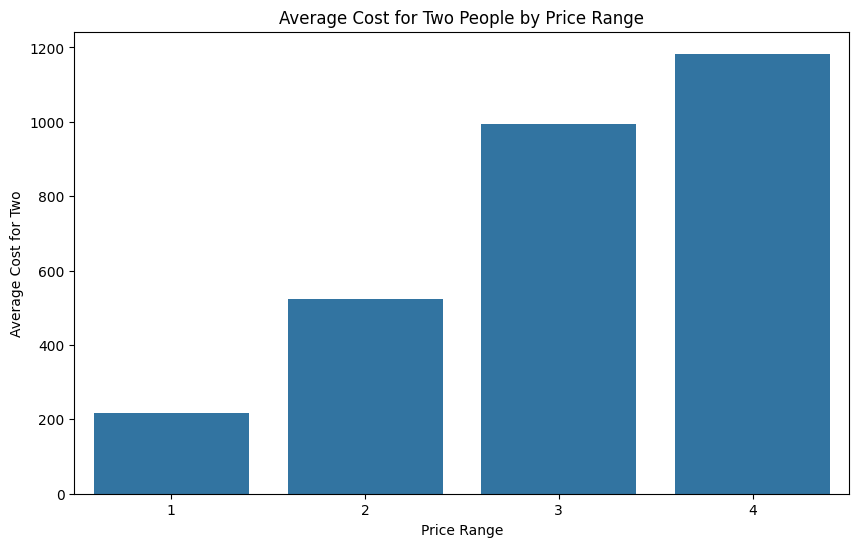

,price_range,average_cost_for_two
0,1,216.66
1,2,522.32
2,3,993.01
3,4,1183.01


In [875]:
# Visualizing the average cost for two people in different price categories
# Grouping by price range and calculating the average cost for two
avg_cost_by_price_range = df_1.groupby('price_range')['average_cost_for_two'].mean().reset_index().round(2)

# Visualizing the average cost for two people in different price categories using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='price_range', y='average_cost_for_two', data=avg_cost_by_price_range)

# Adding labels and title
plt.xlabel('Price Range')
plt.ylabel('Average Cost for Two')
plt.title('Average Cost for Two People by Price Range')

# Displaying the plot
plt.show()
avg_cost_by_price_range

In [876]:
# Investigating the impact of online order availability on restaurant ratings.
# Creating a new column to indicate online order availability
df_1['online_order'] = df_1['highlights'].apply(lambda x: 'Delivery' in x)

# Converting the boolean values to 'Yes' and 'No'
df_1['online_order'] = df_1['online_order'].map({True: 'Yes', False: 'No'})

# Grouping by online order availability and calculating the mean rating
rating_summary = df_1.groupby('online_order')['aggregate_rating'].mean().reset_index().round(2)

# Plotting the results using Plotly
fig = px.bar(
    rating_summary,
    x='online_order',
    y='aggregate_rating',
    title='Impact of Online Order Availability on Restaurant Ratings',
    labels={'online_order': 'Online Order Available', 'aggregate_rating': 'Average Rating'},
    text='aggregate_rating'
)

# Adjusting the size of the chart
fig.update_layout(
    width=1100,
    height=1000
)

# Showing the plot
fig.show()

# Displaying the rating summary
rating_summary


,online_order,aggregate_rating
0,No,2.66
1,Yes,3.36


In [877]:
# Analyzing the distribution of restaurants that offer table booking
# Creating a new column to indicate table booking availability
df_1['table_booking'] = df_1['highlights'].apply(lambda x: 'Table booking recommended' in x)

# Counting the number of restaurants that offer table booking and those that don't
table_booking_distribution = df_1['table_booking'].value_counts().reset_index()
table_booking_distribution.columns = ['Table Booking Available', 'Count']

# Converting the boolean values to 'Yes' and 'No'
table_booking_distribution['Table Booking Available'] = table_booking_distribution['Table Booking Available'].map({True: 'Yes', False: 'No'})

# Plotting the distribution using Plotly
fig = px.bar(
    table_booking_distribution,
    x='Table Booking Available',
    y='Count',
    title='Distribution of Restaurants Offering Table Booking',
    labels={'Table Booking Available': 'Table Booking Available', 'Count': 'Number of Restaurants'},
    text='Count'
)

# Adjusting the size of the chart
fig.update_layout(
    width=800,
    height=1000
)

# Showing the plot
fig.show()

# Displaying the table booking distribution
table_booking_distribution


,Table Booking Available,Count
0,No,49601
1,Yes,5967


In [878]:
# Identifying top restaurant chains based on the number of outlets
top_chains = df_1['name'].value_counts().reset_index()
top_chains.columns = ['Restaurant Chain', 'Number of Outlets']

# Plotting the top restaurant chains using Plotly
fig = px.bar(
    top_chains.head(10),
    x='Number of Outlets',
    y='Restaurant Chain',
    title='Top 10 Restaurant Chains Based on Number of Outlets',
    labels={'Number of Outlets': 'Number of Outlets',
            'Restaurant Chain': 'Restaurant Chain'},
    text='Number of Outlets',
    orientation='h'
)
# Adjusting the size of the chart
fig.update_layout(width=1000,height=600)
# Showing the plot
fig.show()

In [879]:
# Exploring the ratings of these top chains
# Filtering the original dataset to include only the top chains
top_chain_names = top_chains.head(10)['Restaurant Chain']
top_chain_ratings = df_1[df_1['name'].isin(top_chain_names)]

# Calculating average ratings for the top chains
average_ratings = top_chain_ratings.groupby('name')['aggregate_rating'].mean().reset_index().round(2)
average_ratings = average_ratings.rename(columns={'name': 'Restaurant Chain', 'aggregate_rating': 'Average Rating'})

# Merging the number of outlets with average ratings
top_chains_with_ratings = pd.merge(top_chains.head(10), average_ratings, on='Restaurant Chain')

# Plotting the average ratings using Plotly
fig2 = px.bar(
    top_chains_with_ratings,
    x='Average Rating',
    y='Restaurant Chain',
    title='Average Ratings of Top 10 Restaurant Chains',
    labels={'Average Rating': 'Average Rating', 'Restaurant Chain': 'Restaurant Chain'},
    text='Average Rating',
    orientation='h'
)
# Adjusting the size of the chart
fig2.update_layout(width=1000,height=600)
fig2.show()


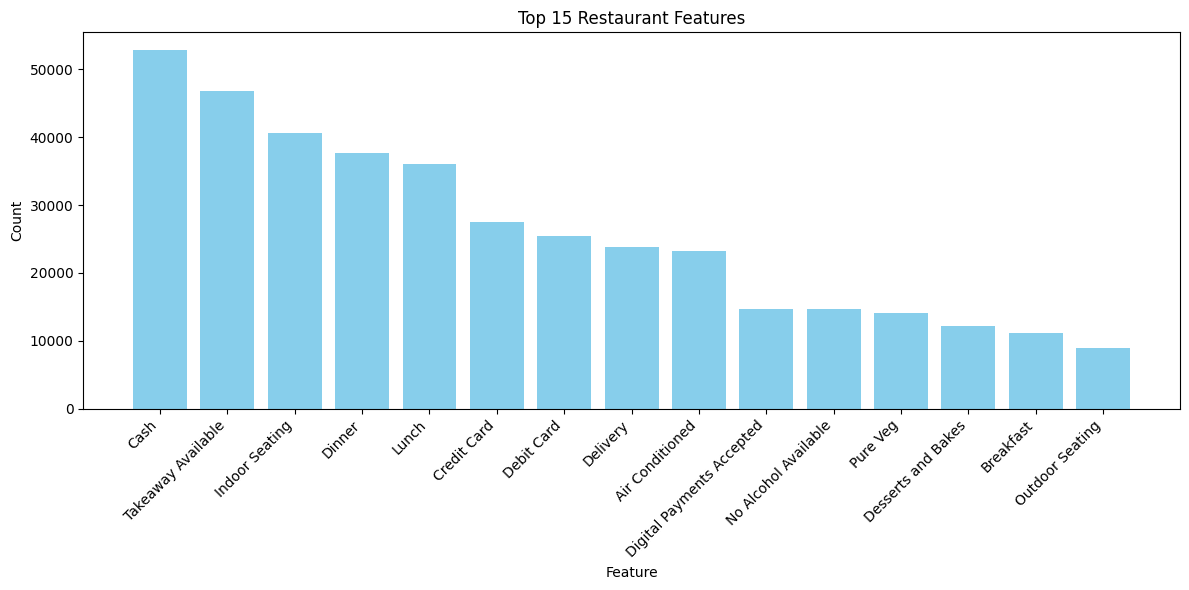

,Feature,Count
6,Cash,52825
3,Takeaway Available,46773
9,Indoor Seating,40609
5,Dinner,37643
2,Lunch,36043
1,Credit Card,27530
4,Debit Card,25464
0,Delivery,23900
8,Air Conditioned,23246
29,Digital Payments Accepted,14740


In [880]:
# Analyze the distribution of restaurants based on features like Wi-Fi, Alcohol availability, etc.
# Splitting the 'highlights' column into individual features and cleaning the data
df_1['highlights'] = df_1['highlights'].apply(lambda x: eval(x) if isinstance(x, str) else [])
all_features = [feature for sublist in df_1['highlights'] for feature in sublist]

# Counting the occurrences of each feature manually
feature_counts = {}
for feature in all_features:
    if feature in feature_counts:
        feature_counts[feature] += 1
    else:
        feature_counts[feature] = 1

# Converting the counts to a DataFrame for easier visualizing
features_df = pd.DataFrame(feature_counts.items(), columns=['Feature', 'Count']).sort_values(by='Count', ascending=False)

# Plotting the top features
plt.figure(figsize=(12, 6))
plt.bar(features_df['Feature'][:15], features_df['Count'][:15], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Restaurant Features')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Displaying the most common features
features_df.head(15)


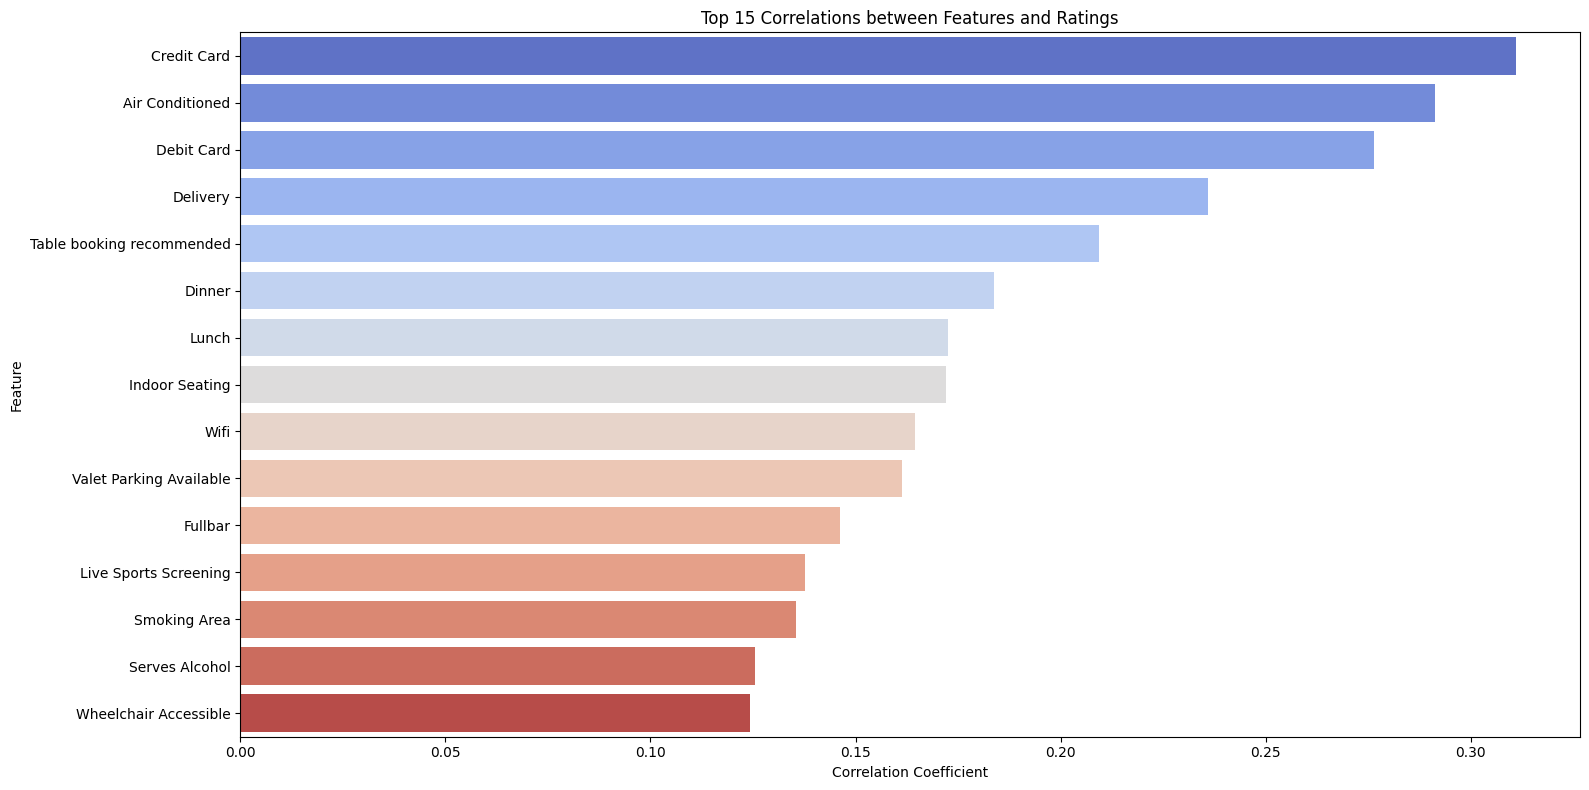

In [881]:
# Investigating if the presence of certain features correlates with higher ratings
# Creating a set of all unique features
unique_features = set(feature for sublist in df_1['highlights'] for feature in sublist)

# Creating a binary matrix for features using vectorized operations and pd.concat
feature_columns = {feature: df_1['highlights'].apply(lambda x: feature in x).astype(int) for feature in unique_features}
df_features = pd.concat(feature_columns, axis=1)
df_1 = pd.concat([df_1, df_features], axis=1)

# Calculating the correlation between each feature and the aggregate rating
correlations = {}
for feature in unique_features:
    correlation = df_1[feature].corr(df_1['aggregate_rating'])
    correlations[feature] = correlation

# Converting to DataFrame for visualizing and selecting top 15 by absolute correlation
correlations_df = pd.DataFrame(correlations.items(), columns=['Feature', 'Correlation'])
correlations_df['AbsCorrelation'] = correlations_df['Correlation'].abs()
top_15_correlations_df = correlations_df.sort_values(by='AbsCorrelation', ascending=False).head(15)

# Plotting the correlation between features and ratings
plt.figure(figsize=(16, 8))
sns.barplot(x='Correlation', y='Feature', hue='Feature', data=top_15_correlations_df, palette='coolwarm', dodge=False, legend=False)
plt.title('Top 15 Correlations between Features and Ratings')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [882]:
top_15_correlations_df

,Feature,Correlation,AbsCorrelation
42,Credit Card,0.311065,0.311065
79,Air Conditioned,0.291365,0.291365
85,Debit Card,0.276379,0.276379
2,Delivery,0.235996,0.235996
98,Table booking recommended,0.209314,0.209314
25,Dinner,0.183847,0.183847
50,Lunch,0.172558,0.172558
66,Indoor Seating,0.172100,0.172100
102,Wifi,0.164584,0.164584
0,Valet Parking Available,0.161211,0.161211


In [883]:
# Extracting and displaying unique values from the 'rating_text' column in the DataFrame
df_1["rating_text"].unique()

array(['Good', 'Very Good', 'Excellent', 'Average', 'Poor', 'Bom',
       'Not rated', 'Çok iyi', 'Ottimo', 'Veľmi dobré', 'Wybitnie',
       'Sangat Baik', 'Průměr', 'Média', 'Excelente', 'Skvělá volba',
       'Bardzo dobrze', 'İyi', 'Baik', 'Ortalama', 'Muy Bueno', 'Scarso',
       'Velmi dobré', 'Promedio', 'Muito Bom', 'Buono', 'Dobré',
       'Vynikajúce', 'Skvělé', 'Terbaik', 'Media', 'Bueno', 'Dobrze',
       'Harika', 'Biasa'], dtype=object)

In [884]:
# Sample dictionary mapping non-English terms to English imported using chatbot
translations = {
    'Veľmi dobré': 'Very Good',
    'Çok iyi': 'Very Good',
    'Muy Bueno': 'Very Good',
    'Média': 'Average',
    'Průměr': 'Average',
    'Vynikajúce': 'Excellent',
    'Skvělá volba': 'Excellent',
    'Bom': 'Good',
    'İyi': 'Good',
    'Bardzo dobrze': 'Very Good',
    'Sangat Baik': 'Very Good',
    'Ortalama': 'Average',
    'Eccellente': 'Excellent',
    'Scarso': 'Poor',
    'Średnio': 'Average',
    'Terbaik': 'Excellent',
    'Velmi dobré': 'Very Good',
    'Excelente': 'Excellent',
    'Ottimo': 'Very Good',
    'Buono': 'Good',
    'Skvělé': 'Excellent',
    'Baik': 'Good',
    'Muito Bom': 'Very Good',
    'Priemer': 'Average',
    'Bueno': 'Good',
    'Media': 'Average',
    'Dobré': 'Good',
    'Promedio': 'Average'
}

# Replacing values in the "ratings_text" column
df_1["rating_text"] = df_1["rating_text"].replace(translations)

# Verifying the changes
df_1["rating_text"].unique()


array(['Good', 'Very Good', 'Excellent', 'Average', 'Poor', 'Not rated',
       'Wybitnie', 'Dobrze', 'Harika', 'Biasa'], dtype=object)

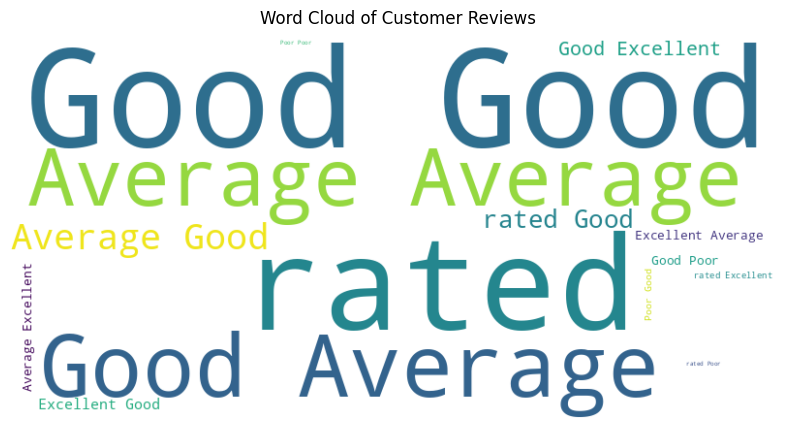

In [885]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Combining all reviews in the 'rating_text' column into a single string
all_reviews = ' '.join(df_1['rating_text'].astype(str))

# Adding custom stopwords
stopwords = set(STOPWORDS)
custom_stopwords = {'restaurant', 'food', 'place', 'order', 'service'}
stopwords.update(custom_stopwords)

# Generating the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800,
                      height=400).generate(all_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Reviews')
plt.show()

In [886]:
from collections import Counter
import re
import plotly.express as px

# Cleaning the text
# Convert to lowercase
all_reviews = all_reviews.lower()

# Removing stopwords
words = [word for word in all_reviews.split() if word not in stopwords]

# Generating word frequency
word_freq = Counter(words)
most_common_words = word_freq.most_common(5)
print("Most Common Words:", most_common_words)

# Plotting the most common words using Plotly
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
fig = px.bar(common_words_df, x='Word', y='Frequency', title='Most Common Words in Customer Reviews', text='Frequency')

# Adjusting the size of the chart
fig.update_layout(
    width=800,
    height=600
)
fig.show()

Most Common Words: [('good', 26984), ('average', 16322), ('rated', 10058), ('excellent', 1623), ('poor', 576)]


In [887]:
# Defining function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Applying sentiment analysis to the 'rating_text' column
df_1['sentiment'] = df_1['rating_text'].apply(get_sentiment)

# Summarizing the sentiments
sentiment_summary = df_1['sentiment'].value_counts().reset_index()
sentiment_summary.columns = ['Sentiment', 'Count']

# Plotting the sentiment summary using Plotly
fig2 = px.bar(sentiment_summary, x='Sentiment', y='Count',
              title='Sentiment Analysis of Customer Reviews', text='Count')

# Adjusting the size of the chart
fig2.update_layout(
    width=800,
    height=600
)

fig2.show()
sentiment_summary

,Sentiment,Count
0,Positive,28607
1,Negative,16898
2,Neutral,10063
